## Effective Sample Sizes

In this notebook we explore and plot the relationship between stepsize and effective sample sizes of 
our samplers on various benchmark functions. 

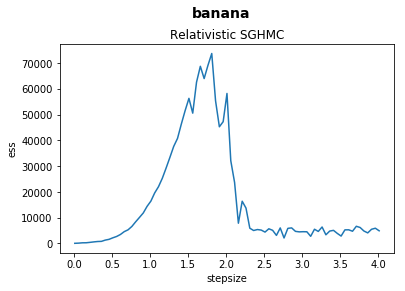

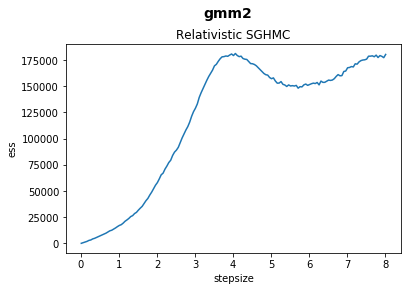

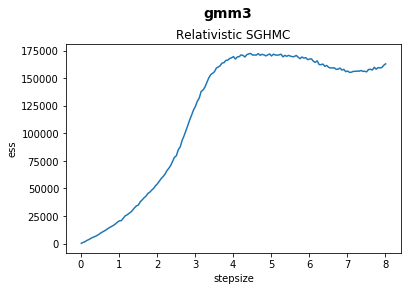

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from string import capwords

import json
from os.path import abspath, basename, splitext
from glob import glob

samplers = (
    "Relativistic_SGHMC", "SGHMC", "SGLD", "SVGD",
)

functions = (
    "banana", 
    # "gmm1",   no data yet!
    "gmm2", 
    "gmm3"
)

data_files = glob("{}/*".format(abspath("./data/effective_sample_sizes")))

for data_file in data_files:
    
    sampler, file_extension = splitext(basename(data_file))
    assert sampler in samplers
    assert file_extension == ".json"
    
    sampler = sampler.replace("_", " ")
    
    with open(data_file, "r") as f:
        data = json.load(f)
    
    for function in functions:
        ess_data = sorted(data[function].items())
        
        stepsizes = tuple(
            stepsize for stepsize, _ in ess_data
        )
        
        average_ess = tuple(
            np.mean(ess_values) for _, ess_values in ess_data
        )
        
        fig = plt.figure()
        fig.suptitle(function, fontsize=14, fontweight="bold")
        ax = fig.add_subplot(111)
        fig.subplots_adjust(top=0.85)
        ax.set_title(sampler)

        ax.set_xlabel("stepsize")
        ax.set_ylabel("ess")

        ax.plot(stepsizes, average_ess, label="function")
